# 데이터 전처리

In [3]:
import pandas as pd

In [5]:
original_path = "C:\Potenup\SecondHanded-Strollers-PredictedPrice\data\\raw\\daangn.csv"
csv_path = "C:\Potenup\SecondHanded-Strollers-PredictedPrice\data\\preprocessed\\daangn.csv"

In [3]:
origin_df = pd.read_csv(original_path)
origin_df.head()

,id,title,detail,condition,uploaded_date,is_completed,price,location
0,fdffb5c6-480b-4891-b6d4-ff41b6fabd83,가격낮춤!(24년3월구매)스토케 익스플로리 엑스 디럭스 유모차,스토케 익스플로리 엑스 디럭스 유모차입니다. ☆보관장소가 협소해서 빠른거래위해 가격...,NaN,2024-11-24 15:15:35.209000,True,600000.0,천호동
1,98f6c307-e94f-4c78-9f6f-c1ab6045a2f3,가격내림제안주세요🩶스토케 비트 블랙멜란지 절충형 유모차 팔아요🩶+방풍커버,21년도에 아기 태어나면서 구매한 절충형 유모차 판매합니다 ! 백만원 넘게 주고 새...,NaN,2023-11-10 20:32:23.635000,True,200000.0,덕은동
2,d9036794-e558-46a6-a1e7-dbde3c900836,[가격내림] 스토케 스쿠트 유모차,스토케 스쿠트 유모차 구입일시: 2023년 7월 (재당근) 당근에서 구매한 스토케 ...,NaN,2024-05-29 21:07:26.426000,True,20000.0,등촌제2동
3,f02eaa6a-784b-4fa7-ab86-06edea7af02b,가격내림) 스토케 익스플로리 엑스 디럭스 유모차(거의새거),신세계 백화점 구매했는데 겨울에 구매해서 밖에 나가보지도 못하고 두고있다 둘째때 써...,NaN,2024-01-15 13:42:37.786000,True,650000.0,대저2동
4,18babe60-fa9e-4bad-a066-f8cd5c6eef56,(가격내림)스토케 크루시 디럭스 유모차,17년도 구매했습니다! 장바구니가 커서 사용하기 좋아요~ 유모차 전문업체 세탁 후 ...,NaN,2024-01-21 11:08:24.848000,True,45000.0,월성1동


In [5]:
df = pd.read_csv(original_path)
df.head()

,id,title,detail,condition,uploaded_date,is_completed,price,location
0,fdffb5c6-480b-4891-b6d4-ff41b6fabd83,가격낮춤!(24년3월구매)스토케 익스플로리 엑스 디럭스 유모차,스토케 익스플로리 엑스 디럭스 유모차입니다. ☆보관장소가 협소해서 빠른거래위해 가격...,NaN,2024-11-24 15:15:35.209000,True,600000.0,천호동
1,98f6c307-e94f-4c78-9f6f-c1ab6045a2f3,가격내림제안주세요🩶스토케 비트 블랙멜란지 절충형 유모차 팔아요🩶+방풍커버,21년도에 아기 태어나면서 구매한 절충형 유모차 판매합니다 ! 백만원 넘게 주고 새...,NaN,2023-11-10 20:32:23.635000,True,200000.0,덕은동
2,d9036794-e558-46a6-a1e7-dbde3c900836,[가격내림] 스토케 스쿠트 유모차,스토케 스쿠트 유모차 구입일시: 2023년 7월 (재당근) 당근에서 구매한 스토케 ...,NaN,2024-05-29 21:07:26.426000,True,20000.0,등촌제2동
3,f02eaa6a-784b-4fa7-ab86-06edea7af02b,가격내림) 스토케 익스플로리 엑스 디럭스 유모차(거의새거),신세계 백화점 구매했는데 겨울에 구매해서 밖에 나가보지도 못하고 두고있다 둘째때 써...,NaN,2024-01-15 13:42:37.786000,True,650000.0,대저2동
4,18babe60-fa9e-4bad-a066-f8cd5c6eef56,(가격내림)스토케 크루시 디럭스 유모차,17년도 구매했습니다! 장바구니가 커서 사용하기 좋아요~ 유모차 전문업체 세탁 후 ...,NaN,2024-01-21 11:08:24.848000,True,45000.0,월성1동


In [6]:
df.shape

(5836, 8)

## 결측치 확인

In [7]:
df.isna().sum()

id                  0
title               0
detail              0
condition        5497
uploaded_date       0
is_completed        0
price               0
location            0
dtype: int64

## 스토케와 관계 없는 행 삭제

In [8]:
stokke_pattern = "스토케|stokke|요요|yoyo"
not_stokke_pattern = "부가부"
not_stokke = df[~df['title'].str.contains(stokke_pattern, na=False, case=False) | df['title'].str.contains(not_stokke_pattern, na=False, case=False)]
print(not_stokke['id'].count())
not_stokke

282


,id,title,detail,condition,uploaded_date,is_completed,price,location
14,4c10c032-71a5-4109-b98a-0e45583e2630,갭 로고 빅숄더 쇼퍼백 새가방(택O)ㅡ기저귀가방도굿,생각보다 커서깜놀요 여행가방이나 운동가실때 휘뚤마뚤 최고인 두께있는 캔버스에코백입니...,NaN,2024-08-26 09:37:18.924000,True,35000.0,정발산동
17,2b9c04e5-2208-47ba-bebc-f0c2c7b524d8,곰돌이 자수 유모차가리개,귀여운 곰돌이 자수가 있는 유모차 가리개입니다. 저희아이는 스토케에 얹어서 썼어요....,NaN,2025-07-28 09:55:12.350000,True,5000.0,농소2동
22,4a5532ba-576a-4f0d-9e3e-02350cd4067d,급매)부가부 버팔로(디럭스),튼튼하고 핸들링이 편한 부가부ㅡ버팔로 2017년식이며 스토케도 디럭스 써봤지만 엄청...,NaN,2023-09-17 16:08:52.089000,True,100000.0,둔촌제2동
38,a0d0f4b3-d4ff-4375-b379-705de9d3ce1c,기내반입가능 잉글레시나 퀴드1 경량유모차,잉글레시나 퀴드1 자주색 판매합니다. 신생아때 디럭스(스토케) 이후 구매한 휴대용 ...,NaN,2025-01-12 15:23:06.891000,True,50000.0,송중동
41,7906baab-dbef-4bc8-af50-fb5f6189e526,[나눔]디럭스유모차,"당근나눔 받아 잘 사용하고, 둘째까지 쓰려고 했는데 이사 계획중이라 나눔합니다! 스...",NaN,2024-07-30 10:18:18.488000,True,100000.0,잠원동
...,...,...,...,...,...,...,...,...
5627,b6b9a1cb-1874-473c-902f-1d75861d07e7,타보 셀라플러스 휴대용유모차&구명조끼,"5키로 미만, 기내반입가능, 오토폴딩. 휴대용 유모차입니다. 애셋 키우면서 스토케부...",NaN,2024-08-20 20:18:50.364000,True,30000.0,정자동
5647,c731bc65-52c7-41d8-a2a1-21ff66380cfe,유모차 | 유아동 | 당근 중고거래,스토케 유모차 나눔 합니다. 사용감 있으나 얼마전까지 어린이집 통학하던 아가가 이제...,NaN,2025-03-10 12:21:33.367000,True,400000.0,개포동
5653,fd2887db-95b0-4a43-9317-2c4585786453,휴대용 유모차,7년전에 일산 덕이점에서 구매후 스토케랑 번갈아 타려고 휴대용겸으로 구매한 제품 입...,NaN,2024-03-23 00:28:56.169000,True,40000.0,만수3동
5702,b290af4e-a4bd-4473-9c58-37e1a3171b51,예떼 디럭스절충 유모차-아기용품추가증정,아기용품추가증정합니다 -라마즈애벌레인형 -아기베개 -노리개 예떼 유모차에요 빨리처분...,NaN,2023-11-18 20:08:52.866000,True,30000.0,성내제2동


In [146]:
df = df[df['title'].str.contains(stokke_pattern, na=False, case=False) | 
        ~df['title'].str.contains(not_stokke_pattern, na=False, case=False)]

In [147]:
df.to_csv(csv_path, index=0)

## 나눔 제품 삭제

In [68]:
df = pd.read_csv(csv_path)

In [69]:
free_item = df[df['title'].str.contains("나눔", na=False)]
for row in free_item.itertuples(index=False):
    print(row.title, row.price, row.location)

❗️급처/오늘만❗️스토케 V3 디럭스 유모차 나눔합니다. 30000.0 등촌동
나눔 세탁완료한 스토케 유모차 나눔합니다 20000.0 유아동
나눔?스토케유모차 100000.0 삼각동
❤️나눔❤️스토케 디럭스 유모차 300000.0 당감제4동
나눔 스토케 디럭스 유모차 100000.0 유아동
❤️나눔❤️ 스토케 디럭스 유모차 59900.0 논현1동
(나눔) 스토케 유모차커버 40000.0 역삼동
[나눔] 스토케 유모차 무료나눔합니다~ 30000.0 성사동
(나눔)스토케 유모차 무료나눔 20000.0 유아동
[나눔]스토케 유모차 블랙 20000.0 포일동
나눔 스토케 유모차 컵걸이 10000.0 삼송동
[나눔] 스토케 유모차 9000.0 덕이동
(나눔) 스토케 유모차 17000.0 도내동
나눔) 스토케 유모차 850000.0 동홍동
(나눔) 스토케 유모차 5000.0 동산동
[나눔] 스토케 유모차 50000.0 임암동
나눔) 스토케 익스플로리 디럭스 유모차 28000.0 도련일동
(나눔)스토케 익스플로리 유모차 35000.0 용산동
나눔)스토케 절충형 유모차 120000.0 암사동
[나눔] stokke 스토케 유모차 나눔합니다 75000.0 성내제3동
디럭스 스토케 유모차 나눔 1000.0 오륜동
명품! 유모차! 스토케 무료 나눔! 20000.0 새롬동
무료나눔 스토케유모차 9950000.0 유아동
무료나눔) 스토케 유모차 55000.0 등촌제3동
무료나눔 스토케 유모차 100000.0 정발산동
🌟무료나눔🌟 스토케 크루지 유모차 150000.0 압구정동
(문고리) 스토케 디럭스 유모차 나눔 20000.0 유아동
스토케디럭스유모차 나눔합니다. 410000.0 명지1동
스토케디럭스 유모차 나눔 110000.0 산울동
스토케디럭스 유모차 나눔 20000.0 유아동
스토케유모차나눔이요 6000.0 집현동
스토케유모차나눔합니다() 75000.0 본리동
스토케유모차나눔 600000.0 갈마동
스토케유모차나눔♡ 50000.0 만수동
스토케유모차나눔 20000.0 고양동
스토케

In [70]:
df = df[~df['title'].str.contains("나눔", na=False)]

In [153]:
df.to_csv(csv_path, index=0)

## 유모차가 아닌 데이터

In [ ]:
not_stroller_pattern = "유모차 컵홀더|스케토 컵홀더|스토케 풋머프|스토케풋머프|스토케 풋워머|스토케 방한 풋머프|스토케 방한용품|스토케 방한커버"
df = df[~df['title'].str.contains(not_stroller_pattern, na=False)]

In [173]:
# 방한 관련 키워드
winter_keywords = "풋머프|풋워머|워머|핸드머프|핸드워머|방한커버|방한용품|방수커버|방수패드|방한|컵홀더"

# 조건 1) 제목에 유모차가 포함된 경우는 무조건 살림
# 조건 2) 유모차 없는 방한용품 단품만 필터링해서 제거
df[~((df['title'].str.contains("유모차", na=False)) | (~df['title'].str.contains(winter_keywords, na=False)))].count()

id               34
title            34
detail           34
condition         2
uploaded_date    34
is_completed     34
price            34
location         34
dtype: int64

c:\Potenup\SecondHanded-Strollers-PredictedPrice\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


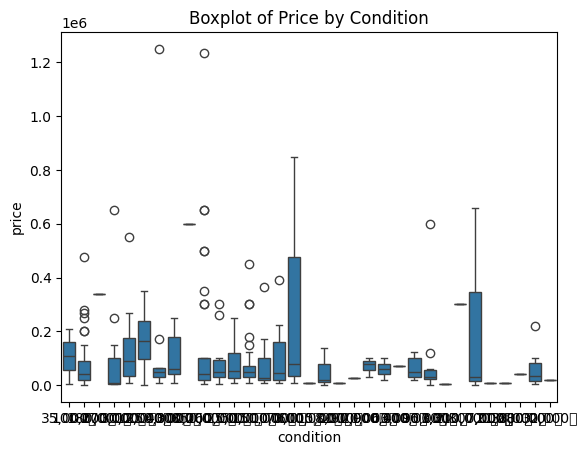

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="condition", y="price", data=df)
plt.title("Boxplot of Price by Condition")
plt.show()


## 모델명 세팅

In [6]:
df = pd.read_csv(csv_path)

In [2]:
import re

def make_pattern(word: str, include_korean=None):
    """
    word: 영문 기준 단어 (예: 'yoyo')
    include_korean: 같이 묶을 한글 단어 리스트 (예: ['요요'])
    """
    patterns = [word]
    if include_korean:
        patterns.extend(include_korean)
    # | 로 묶어서 패턴 생성 (대소문자 무시)
    return re.compile("|".join(patterns), re.IGNORECASE)

In [7]:
yoyo_pattern = "요요|yoyo"
has_yoyo = df['title'].str.contains(yoyo_pattern, na=False, case=False) 

explori_pattern = "익스플로리|xplory"
has_explori = df['title'].str.contains(explori_pattern, na=False, case=False)

trailz_pattern = "트레일즈|trailz"
has_trailz = df['title'].str.contains(trailz_pattern, na=False, case=False) 

beat_pattern = "비트|beat"
has_beat = df['title'].str.contains(beat_pattern, na=False, case=False) 

crusi_pattern = '크루시|crusi'
has_crusi = df['title'].str.contains(crusi_pattern, na=False, case=False)

scoot_pattern = '스쿠트|scoot'
has_scoot = df['title'].str.contains(scoot_pattern, na=False, case=False)

In [74]:
origin_df.shape

(5836, 8)

In [75]:
df.shape

(5152, 10)

In [8]:
df[has_yoyo | has_trailz | has_explori | has_beat | has_crusi | has_scoot].count()

id               1863
title            1863
detail           1863
condition          90
uploaded_date    1863
is_completed     1863
price            1863
location         1863
dtype: int64

In [135]:
df[~(has_yoyo | has_trailz | has_explori | has_beat | has_crusi)].count()

id               3245
title            3245
detail           3245
condition         196
uploaded_date    3245
is_completed     3245
price            3245
location         3245
dtype: int64

In [78]:
df[df['title'].str.contains('디럭스')].count()

Unnamed: 0.1     1282
Unnamed: 0       1282
id               1282
title            1282
detail           1282
condition          68
uploaded_date    1282
is_completed     1282
price            1282
location         1282
dtype: int64

In [8]:
df.shape

(861, 11)

In [ ]:
df[df['title'].str.contains('절충형')].count()

## condition 결측치

In [171]:
new_pattern = '새상품|미개봉|미사용'
df[df['title'].str.contains(new_pattern) | df['detail'].str.contains(new_pattern)].count()

id               387
title            387
detail           387
condition         24
uploaded_date    387
is_completed     387
price            387
location         387
dtype: int64

In [166]:
old_pattern = '흠집|자국|찍힘|찢어짐|중고|오래됨'
df[df['title'].str.contains(old_pattern) | df['detail'].str.contains(old_pattern)].count()

id               738
title            738
detail           738
condition         37
uploaded_date    738
is_completed     738
price            738
location         738
dtype: int64